# KNN on Digit dataset with Scratch & Sklearn

## Scratch

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm



In [62]:
from sklearn.datasets import load_digits

load_digits(return_X_y=True)[0].shape

(1797, 64)

In [63]:
data = load_digits(return_X_y=True)
X = data[0]
y = data[1]

print (X.shape, y.shape)

(1797, 64) (1797,)


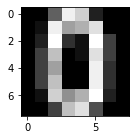

In [67]:
plt.figure(0, figsize=(2, 2))
plt.imshow(X[516].reshape((8, 8)), cmap='gray')
plt.show()

In [68]:
dataset = np.concatenate((X, y.reshape((-1, 1))), axis=1)
print (dataset.shape)

(1797, 65)


In [70]:
train = dataset[:1500]
test = dataset[1500:]

print (train.shape, test.shape)

(1500, 65) (297, 65)


In [75]:
def test_on_set(trainset, testing, k=3):
    preds = []
    target = []
    # start = datetime.datetime.now()
    for ix in range(testing.shape[0]):
        out = knn(trainset, testing[ix, :-1], k=k)
        preds.append(out)
        target.append(testing[ix, -1])
    preds = np.asarray(preds)
    target = np.asarray(target)


    acc = float((preds == target).sum()) / len(preds)

    print( "Accuracy: {} wiht k: {}".format(acc, k))
    return acc

In [58]:
def euc_dist(x1, x2):
    return np.sqrt(((x1-x2)**2).sum())


In [82]:
def knn(train, test, k=3):
    dist = []
    
    for i in range(train.shape[0]):
        # Get the vector and label
        ix = train[i, :-1]
        iy = train[i, -1]
        # Compute the distance from test point
        d = euc_dist(test, ix)
        dist.append([d, iy])
    # Sort based on distance and get top k
    dk = sorted(dist, key=lambda x: x[0])[:k]
    # Retrieve only the labels
    labels = np.array(dk)[:, -1]
    
    # Get frequencies of each label
    output = np.unique(labels, return_counts=True)
    # Find max frequency and corresponding label
    index = np.argmax(output[1])
    return output[0][index]

In [86]:
acc_scr = []
ks = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

for kx in tqdm(ks):
    acx = test_on_set(train, test, k=kx)
    acc_scr.append(acx)

Accuracy: 0.9562289562289562 wiht k: 2
Accuracy: 0.9595959595959596 wiht k: 3
Accuracy: 0.9595959595959596 wiht k: 4
Accuracy: 0.9562289562289562 wiht k: 5
Accuracy: 0.9461279461279462 wiht k: 6
Accuracy: 0.9461279461279462 wiht k: 7
Accuracy: 0.9427609427609428 wiht k: 8
Accuracy: 0.9427609427609428 wiht k: 9
Accuracy: 0.9427609427609428 wiht k: 10
Accuracy: 0.9427609427609428 wiht k: 11
Accuracy: 0.9427609427609428 wiht k: 12
Accuracy: 0.9393939393939394 wiht k: 13



In [87]:
X_train = train[:,:-1]
y_train = train[:,-1]
X_test = test[:,:-1]
y_test = test[:, -1]

X_train.shape , X_test.shape, y_train.shape, y_test.shape

((1500, 64), (297, 64), (1500,), (297,))

## Sklearn

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc_sk = []

for k in tqdm(ks):
    
    classifier = KNeighborsClassifier(n_neighbors= k)
    classifier.fit(X_train, y_train) 
    
    y_pred = classifier.predict(X_test)
    acc_sk.append(accuracy_score(y_test, y_pred))

acc_sk 

[0.9562289562289562,
 0.9595959595959596,
 0.9595959595959596,
 0.9562289562289562,
 0.9461279461279462,
 0.9461279461279462,
 0.9427609427609428,
 0.9427609427609428,
 0.9427609427609428,
 0.9427609427609428,
 0.9427609427609428,
 0.9393939393939394]

In [93]:
# 